/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


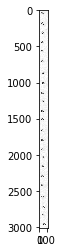

(23,)
(32, 46)


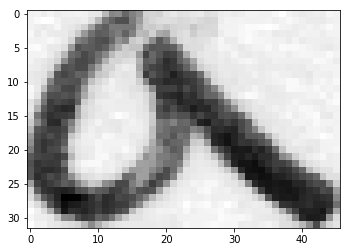

In [38]:
# -*- coding: utf-8 -*-
"""
PIC 16 Winter 2019
Startup code for homework 8
"""

from scipy.misc import imread # using scipy's imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

def boundaries(binarized,axis):
    # variables named assuming axis = 0; algorithm valid for axis=1
    # [1,0][axis] effectively swaps axes for summing
    rows = np.sum(binarized,axis = [1,0][axis]) > 0
    rows[1:] = np.logical_xor(rows[1:], rows[:-1])
    change = np.nonzero(rows)[0]
    ymin = change[::2]
    ymax = change[1::2]
    height = ymax-ymin
    too_small = 10 # real letters will be bigger than 10px by 10px
    ymin = ymin[height>too_small]
    ymax = ymax[height>too_small]
    return zip(ymin,ymax)

def separate(img):
    orig_img = img.copy()
    pure_white = 255.
    white = np.max(img)
    black = np.min(img)
    thresh = (white+black)/2.0
    binarized = img<thresh
    row_bounds = boundaries(binarized, axis = 0) 
    cropped = []
    for r1,r2 in row_bounds:
        img = binarized[r1:r2,:]
        col_bounds = boundaries(img,axis=1)
        rects = [r1,r2,col_bounds[0][0],col_bounds[0][1]]
        cropped.append(np.array(orig_img[rects[0]:rects[1],rects[2]:rects[3]]/pure_white))
    return cropped

# Example usage
big_img = imread("a.png", flatten = True) # flatten = True converts to grayscale
plt.imshow(big_img/255,cmap='gray')
plt.show()

imgs = np.array(separate(big_img))# separates big_img (pure white = 255) into array of little images (pure white = 1.0)

'''for img in imgs:
    img = resize(img, (10,10))
    plt.imshow(img, cmap='gray')
    plt.show()
'''
print imgs.shape #imgs has arrays of some dimension that machine does not know, so it treats as 1-d array, 
                #with each element be an array of arbitrary dimension
print imgs[0].shape#each single img array in the imgs has 2-d dimension of 32*46, can be reshaped later

#img_single_new = imgs[0].reshape(1,64) #can't do that
img_single_new = resize(imgs[0], (1,64)) #this is ok????

#print img_single_new

img1 = resize(imgs[0], (10,10)) #use this to resize the image array be 10*10 square
plt.imshow(img1, cmap='gray') 
plt.imshow(imgs[0], cmap='gray') #also ok just to plot the original image without reshape, the graph will have
                                #different shape, but still ok

#plt.show()




The given function returns an array of 1-d, with each element be array of separated image of 2-d, dimension 32*46. The 2-d array is what need to be passed for clf training and predicting functions.


In [46]:
img_list =[]
for i in range(len(imgs)):
    img_list.append(resize(imgs[i], (1,100)))
print np.shape(img_list)
img_list2 =[]
for i in range(len(imgs)):
    img_list2.append(img_list[i][0])
print np.shape(img_list2) #list2 has the desired 23*100 dimension



(23, 1, 100)
(23, 100)


In [49]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C= 100) #can use these parameter in HW
train_data = img_list2[:10]
#print train_data[0].shape
target_array = np.array([0]*23)

#print train_data.shape
train_target = target_array[:10]
#print train_target.shape

test_data = imgs[10]
test_target = target_array[10]
#n = len(test_target)
clf.fit(train_data,train_target)

ValueError: The number of classes has to be greater than one; got 1 class